In [1]:
# extract log file and make runtime plots and tables

#log = open("/Users/shawnmeier/Documents/source/bounder/soot_hopper/log/logging.log-apr12-fullrun2",'r')
log = open("/Users/shawnmeier/Documents/source/bounder/soot_hopper/log/logging.log",'r')

loglines = log.readlines()
log.close()

#get index of recent run
startInd = 0
lastRunStart = 0
for line in loglines:
    if "Starting experiments run" in line:
        lastRunStart = startInd
    startInd += 1

expLines = loglines[lastRunStart:]
rowtimes = [line for line in loglines if "Row" in line and "time(ms)" in line]
for rowtime in rowtimes:
    spl = rowtime.split(":")
    print("%s %f" % (spl[-2], float(spl[-1])/1000000))

In [2]:
import matplotlib.pyplot as plt
def parseTime(s):
    return float(s.split(":")[-1].strip())/1000000
feasibility_times = [parseTime(line) for line in loglines if "feasibility " in line]
#subsumption time

subsumption_times_true = [parseTime(line) for line in loglines if "subsumption " in line and "result:true" in line]
subsumption_times_false = [parseTime(line) for line in loglines if "subsumption " in line and "result:false" in line]
print("feasibility lines: %i" % len(feasibility_times))
print("subsumption lines: %i" % len(subsumption_times))

In /Users/shawnmeier/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/shawnmeier/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/shawnmeier/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/shawnmeier/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/shawnmeier/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib

feasibility lines: 16762


NameError: name 'subsumption_times' is not defined

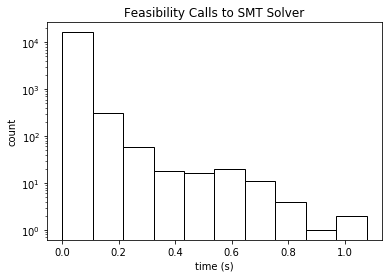

In [20]:
plt.hist(feasibility_times, color='white',edgecolor='black')
plt.xlabel("time (s)")
plt.ylabel("count")
plt.yscale('log')
plt.title('Feasibility Calls to SMT Solver')
plt.savefig("/Users/shawnmeier/Documents/source/bounder_paper/Bounder/paper2/figures/feas_time.png",dpi=400)
plt.show()

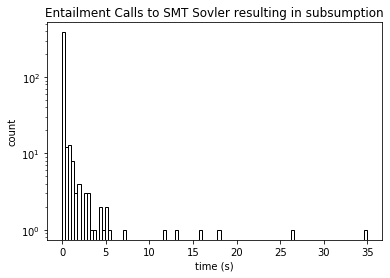

In [21]:
plt.hist(subsumption_times_true, bins=100, color='white',edgecolor='black')
plt.xlabel("time (s)")
plt.ylabel("count")
plt.yscale('log')
plt.title('Entailment Calls to SMT Sovler resulting in subsumption')
plt.savefig("/Users/shawnmeier/Documents/source/bounder_paper/Bounder/paper2/figures/subs_time_true.png",dpi=400)
plt.show()

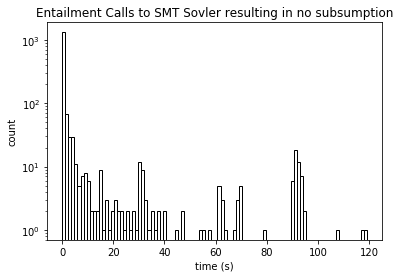

In [22]:
plt.hist(subsumption_times_false, bins=100, color='white',edgecolor='black')
plt.xlabel("time (s)")
plt.ylabel("count")
plt.yscale('log')
plt.title('Entailment Calls to SMT Sovler resulting in no subsumption')
plt.savefig("/Users/shawnmeier/Documents/source/bounder_paper/Bounder/paper2/figures/subs_time_false.png", dpi=400)
plt.show()